# Stock Market Portfolio Optimization with Python

### Stock market portfolio optimization is the process of selecting the best combination of stocks to maximize returns while minimizing the risk, based on historical performance data and financial metrics. If you want to learn how to optimize a stock market portfolio by analyzing the stock market performance, this article is for you. In this project, I’ll take you through the task of stock market portfolio optimization with Python.

### Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as Modern Portfolio Theory (MPT), we can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

### The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

### To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. I will collect real-time stock market data using the yfinance API. If you need historical data, you can download it from here.

### Now, let’s get started with the task of stock market portfolio optimization by importing the necessary Python libraries and collecting the stock market data using the yfinance API. If you are about to use this API for the first time, you can install it on your Python environment by executing the command below on your terminal or command prompt:

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Now, let’s collect the stock market data of some popular Indian companies:

In [3]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# List of stock tickers to download
tickers = ['TCS.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'NESTLEIND.NS', 'IRCTC.NS']

# Download the stock data
data = yf.download(tickers, start=start_date, end=end_date, progress=False, group_by='ticker')

# Reset index to bring Date into the columns for the melt function
data = data.stack(level=0).reset_index()

# Melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date', 'Ticker'], var_name='Attribute', value_name='Value')

# Pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='Value', aggfunc='first')

# Reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

# Display the first few rows of the processed data
print(stock_data.head())

YF.download() has changed argument auto_adjust default to True
Attribute       Date        Ticker        Close         High          Low  \
0         2024-05-29   HDFCBANK.NS  1508.300049  1523.849976  1501.250000   
1         2024-05-29      IRCTC.NS  1029.019775  1047.174909  1013.479397   
2         2024-05-29  NESTLEIND.NS  2449.818359  2470.396803  2418.950814   
3         2024-05-29   RELIANCE.NS  1435.901611  1453.068324  1433.584403   
4         2024-05-29        TCS.NS  3776.600830  3821.529042  3772.976883   

Attribute         Open      Volume  
0          1518.000000  17573853.0  
1          1032.177138   7214522.0  
2          2421.622000    869600.0  
3          1441.607222   7383556.0  
4          3821.529042   1568095.0  


### Now, let’s have a look at the stock market performance of these companies in the stock market over time:

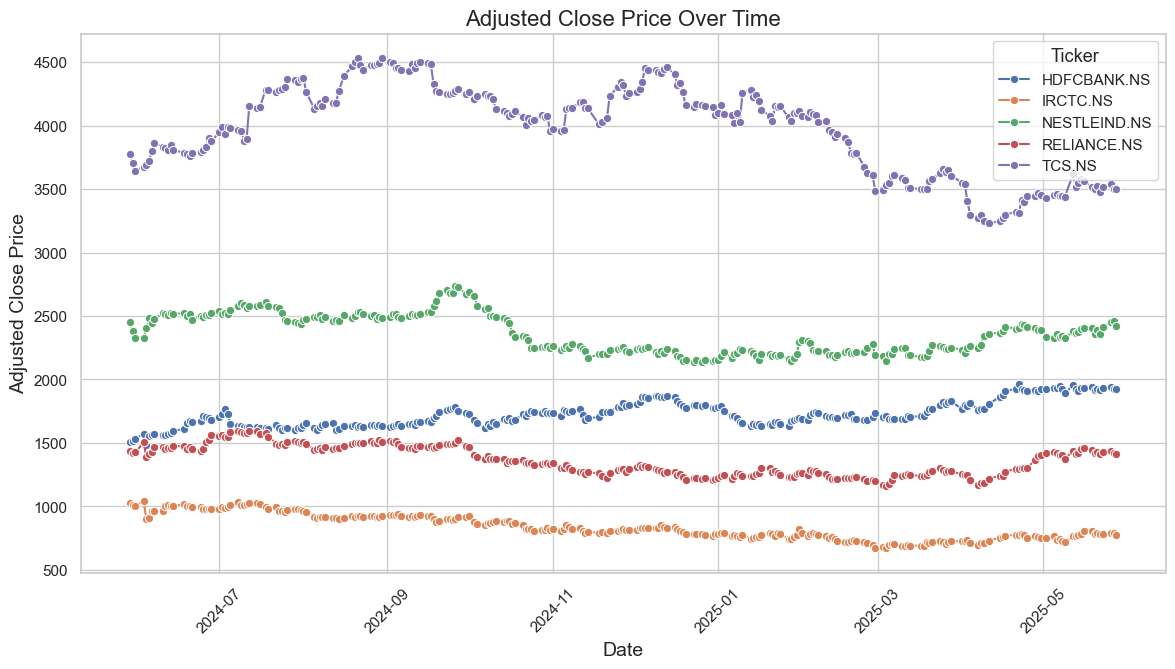

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

### The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, IRCTC.NS, NESTLEIND.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. It highlights that TCS has the highest adjusted close prices, followed by NESTLEIND,RELIANCE, IRCTC, and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK, NESTLEIND and IRCTC exhibit more stability with relatively lower price fluctuations.

### Now, let’s compute the 50-day and 200-day moving averages and plot these along with the Adjusted Close price for each stock:

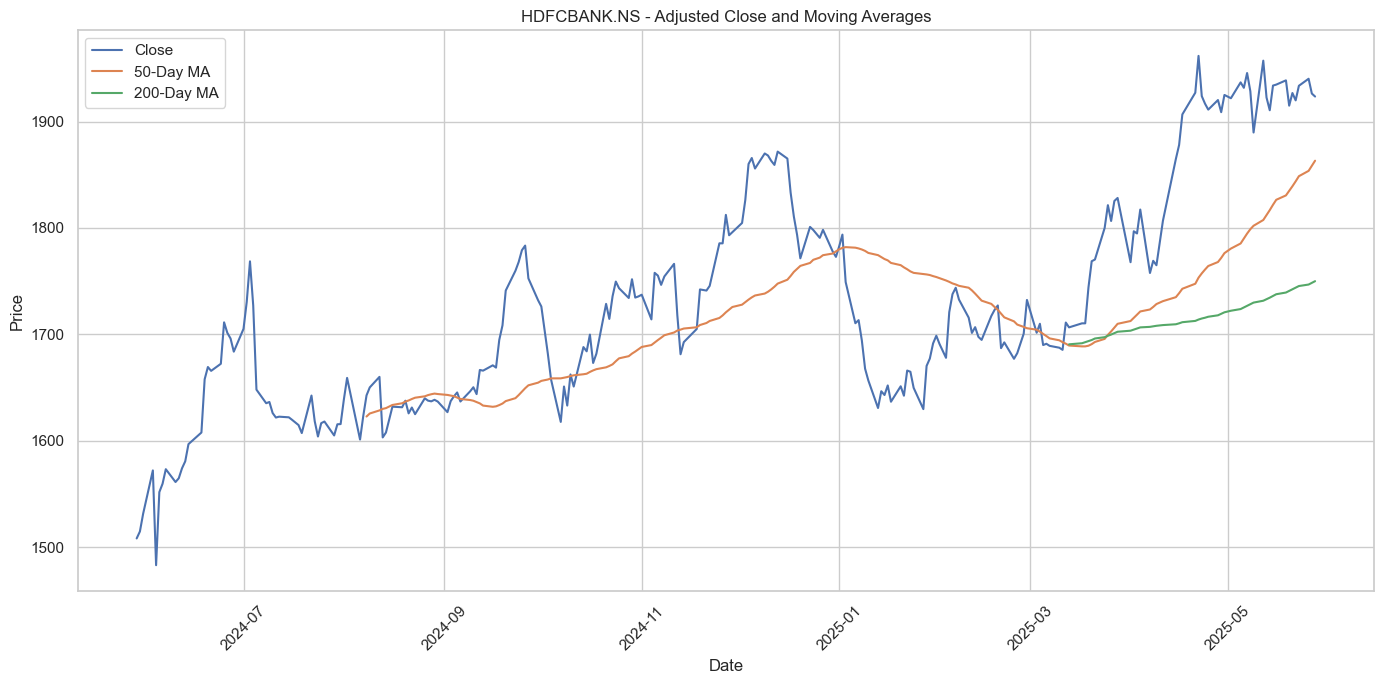

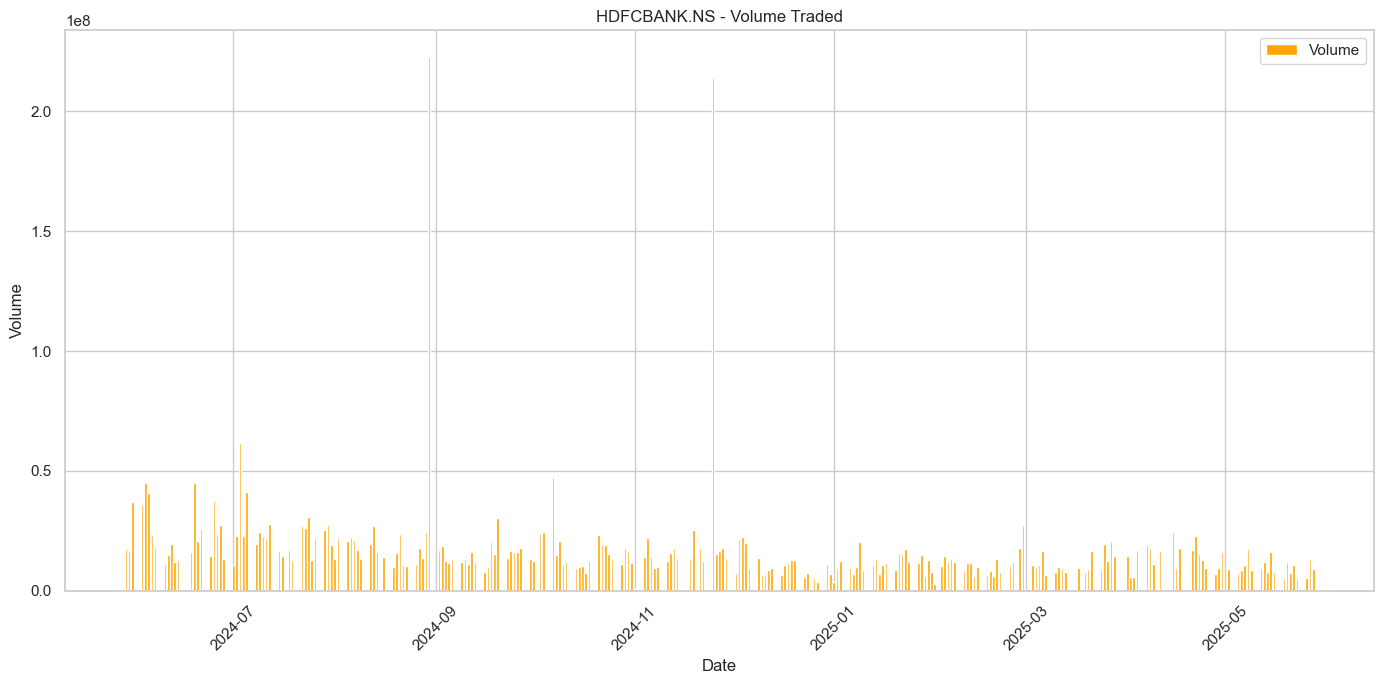

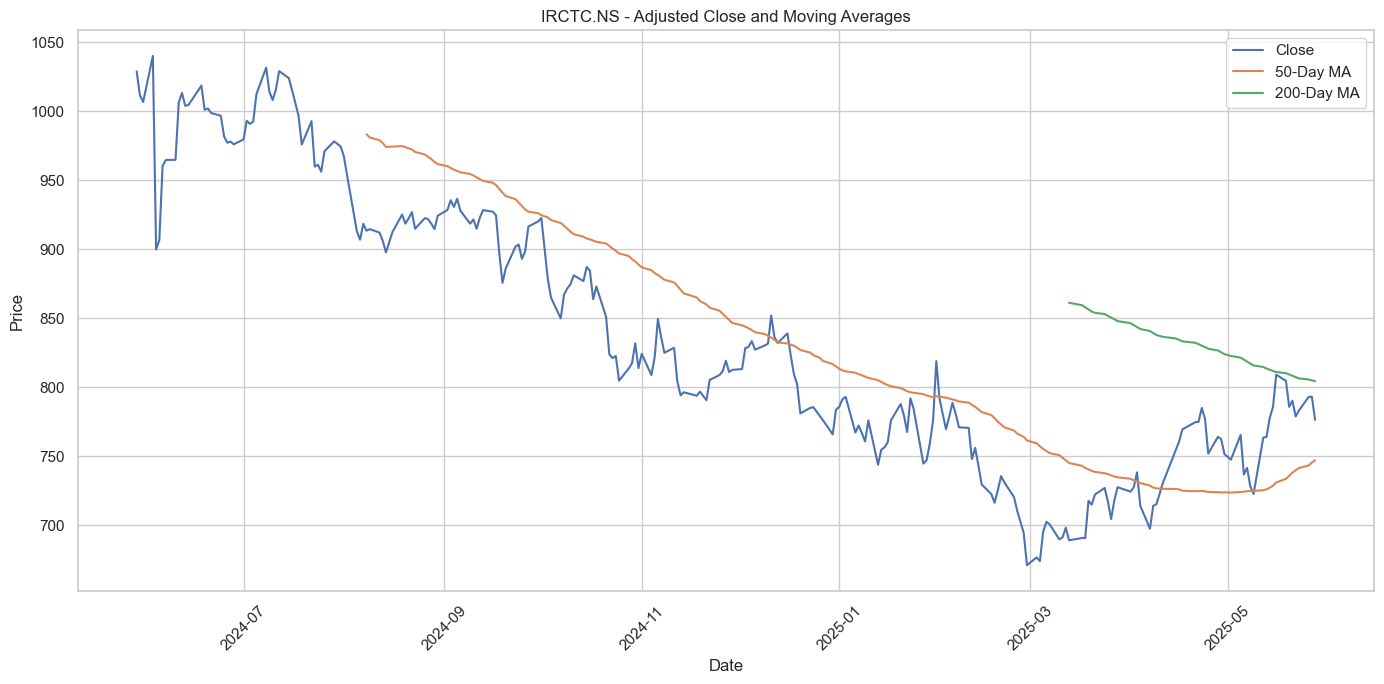

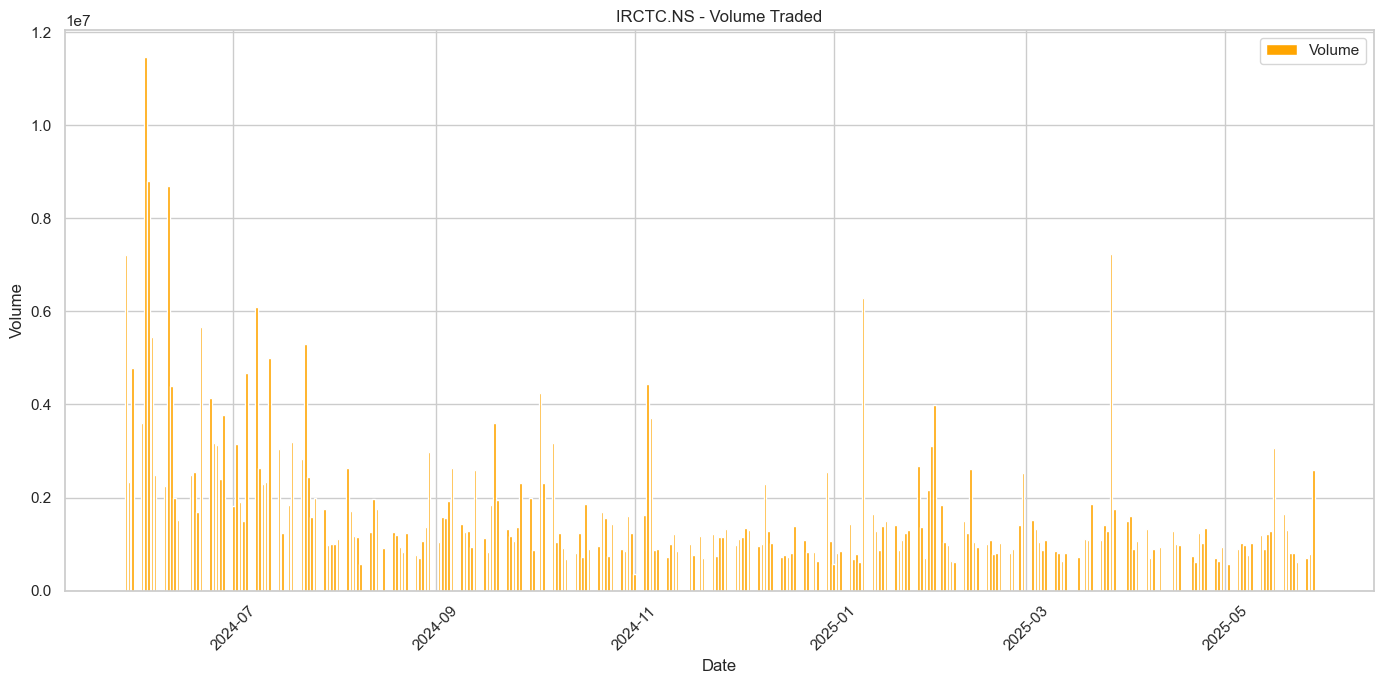

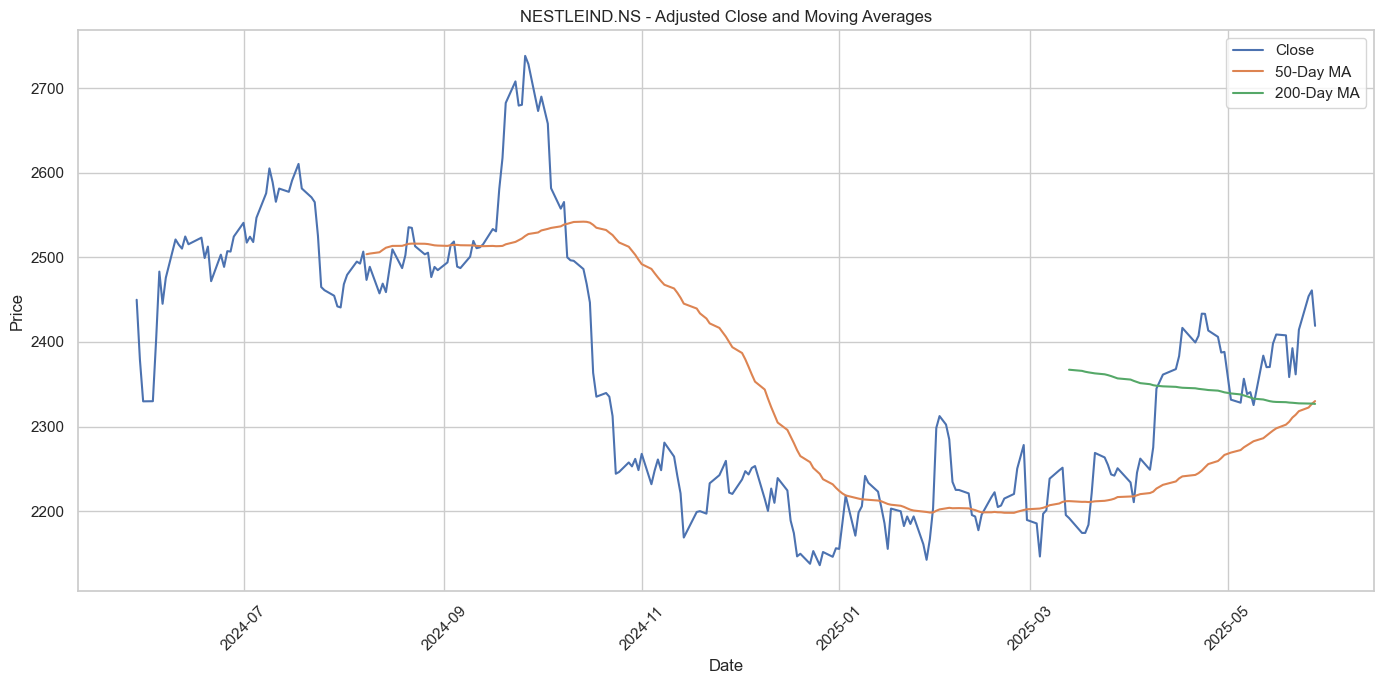

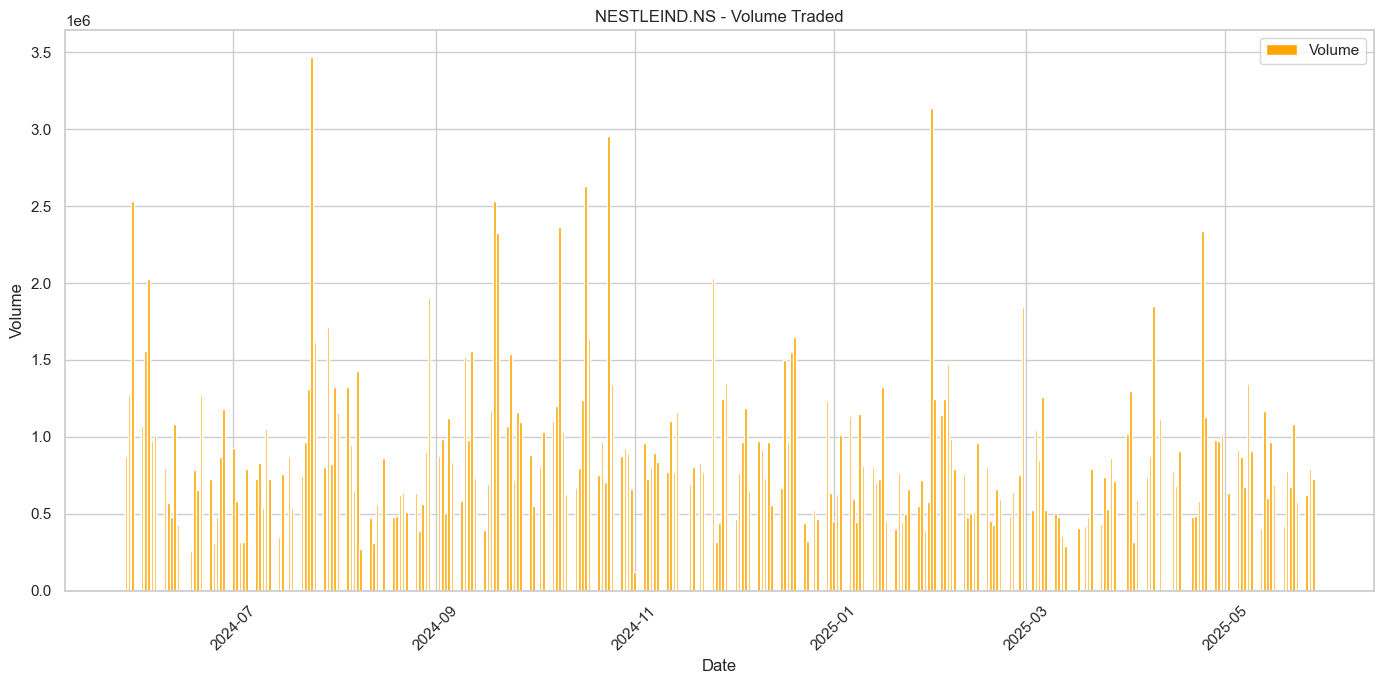

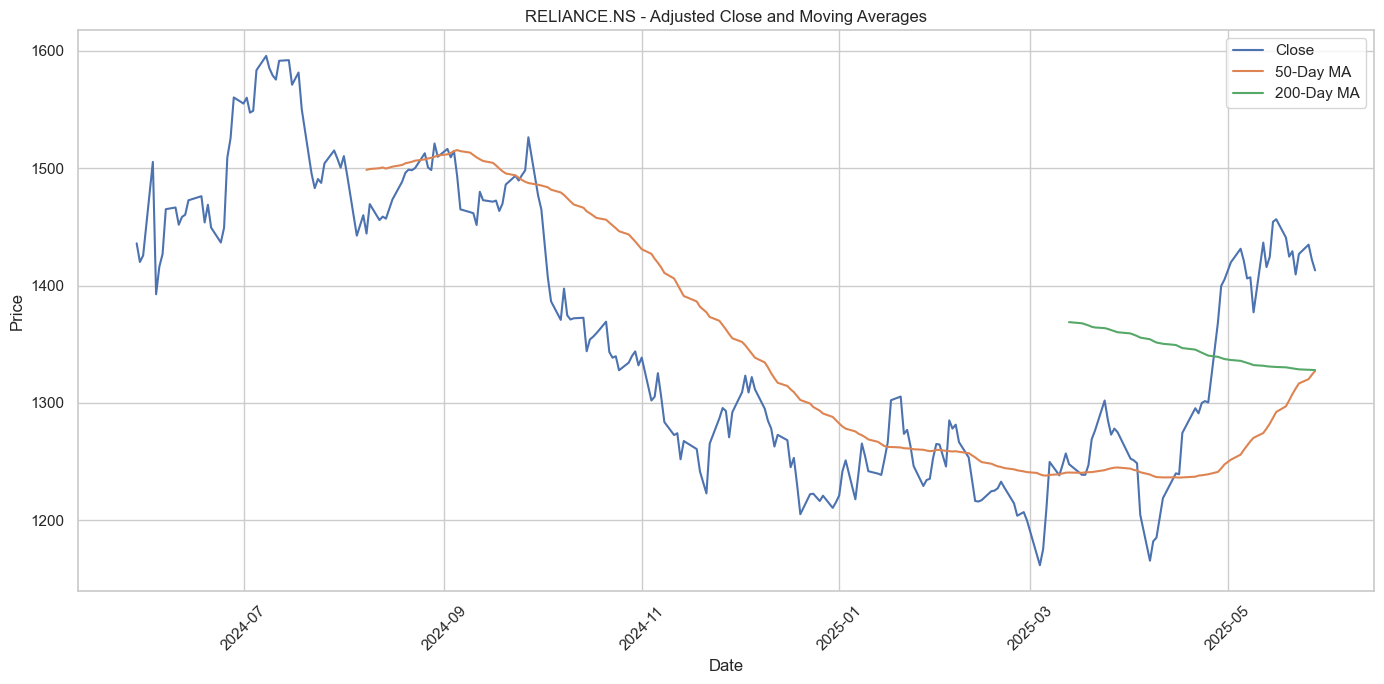

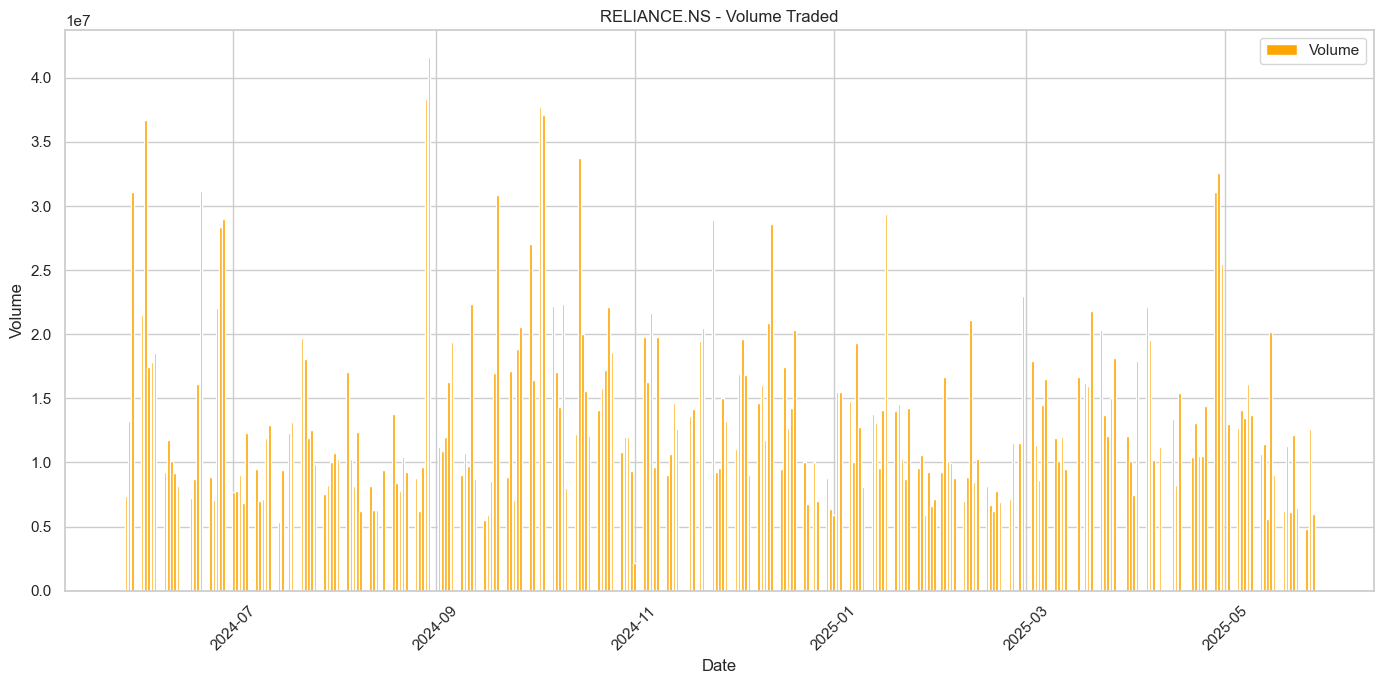

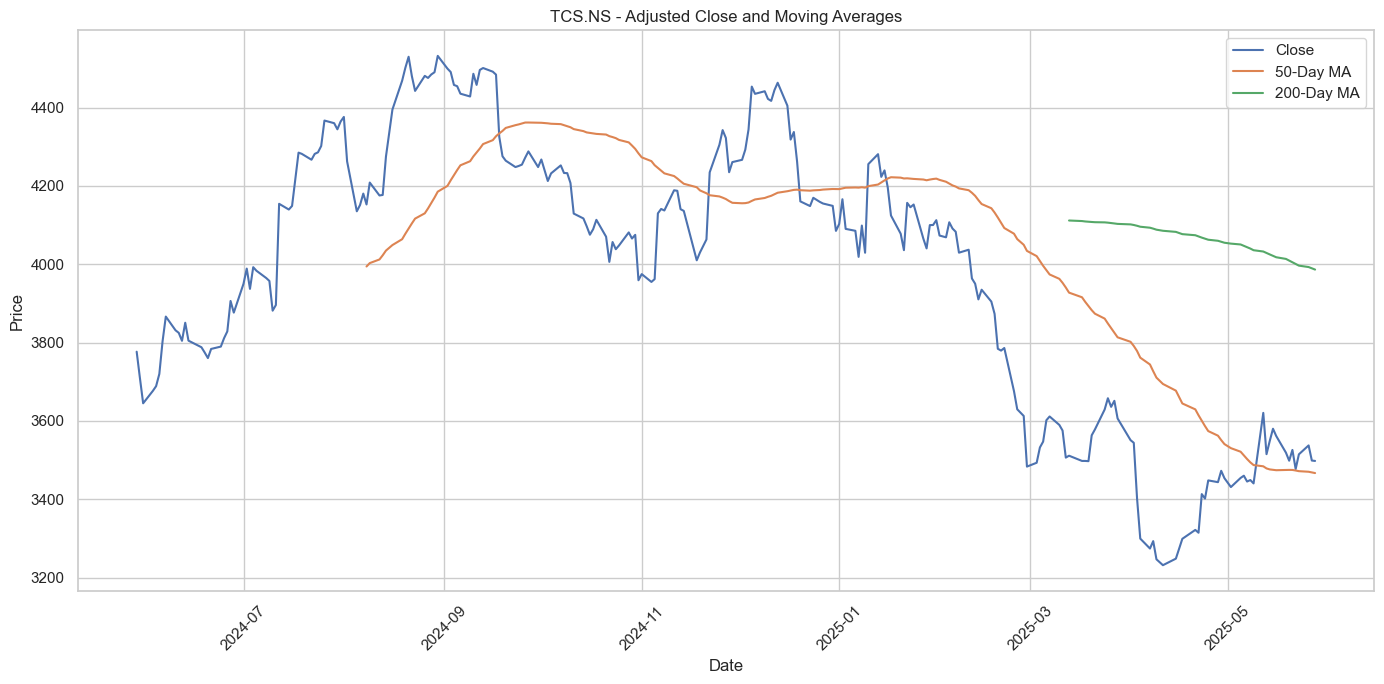

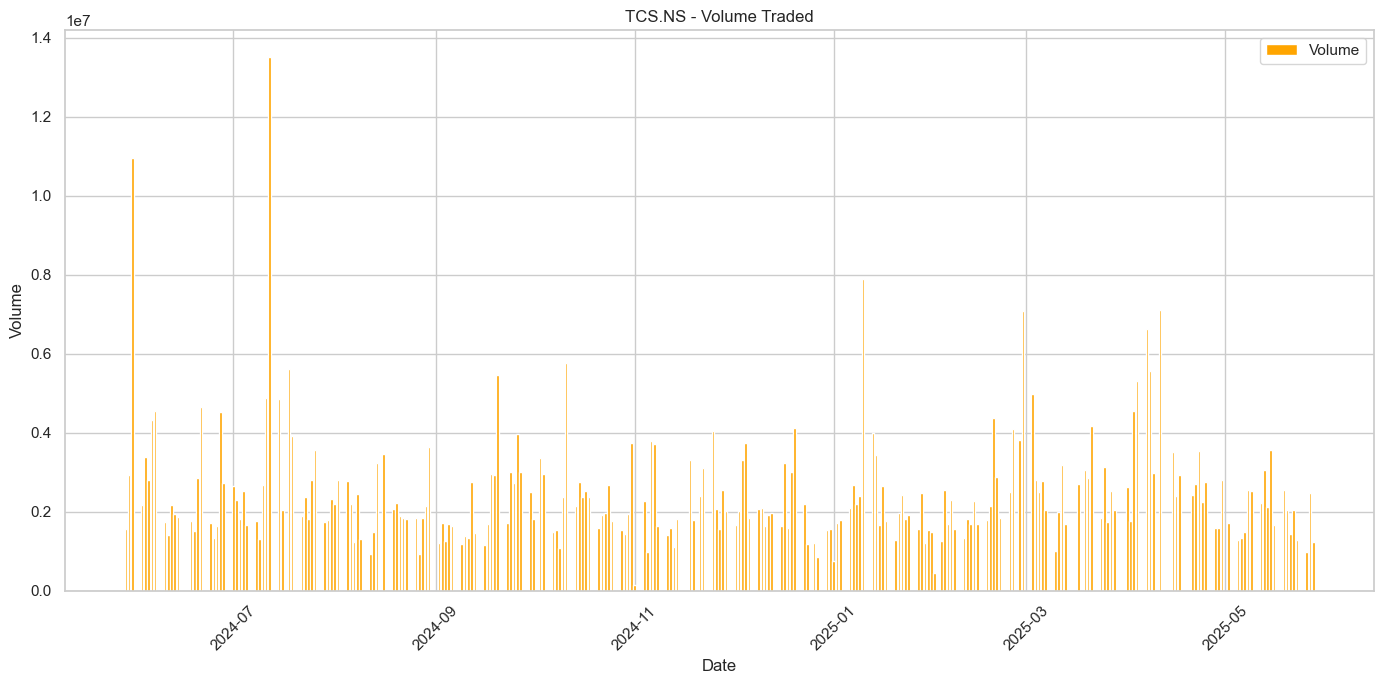

In [12]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### For HDFCBANK and NESTLEIND, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

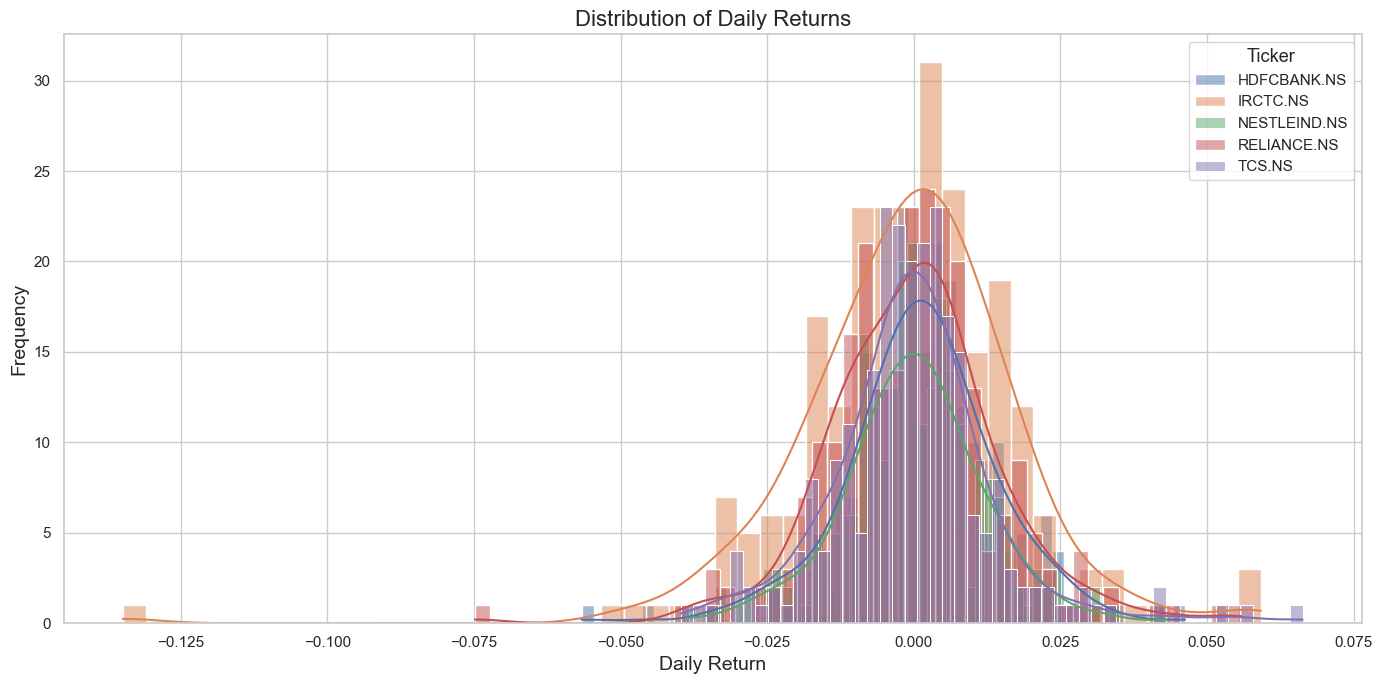

In [14]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

### The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. IRCTC,NESTLEIND and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to HDFCBANK and TCS.


### Now, let’s see if there’s any correlation between all these stocks:

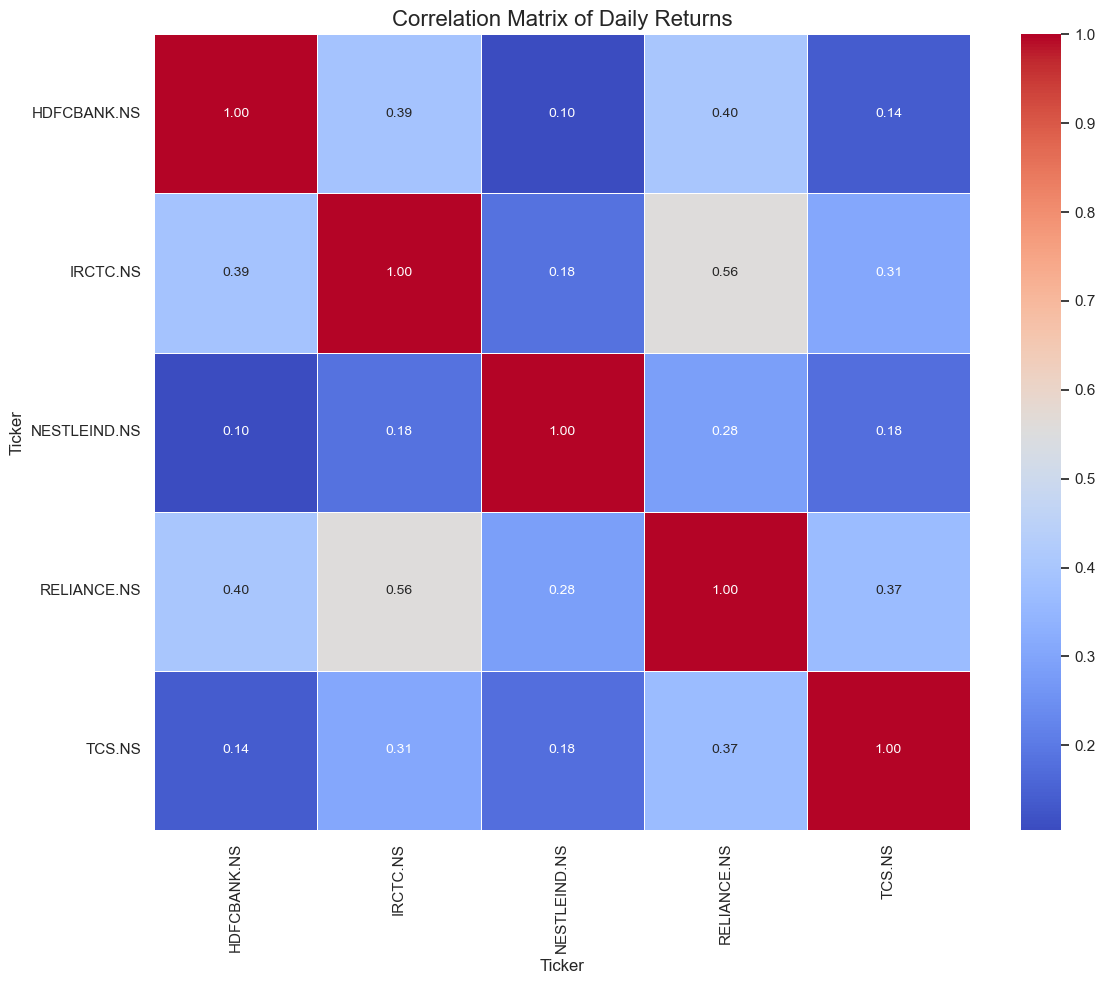

In [17]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### IRCTC and RELIANCE have a high positive correlation (0.56), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.40) and a low correlation with NESTLEIND (0.10) and TCS (0.14). NESTLEIND shows a low correlation with TCS (0.18) and IRCTC (0.18). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

## Portfolio Optimization

## Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:
## 1.Calculate the expected returns and volatility for each stock.
## 2.Generate a series of random portfolios to identify the efficient frontier.
## 3.Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

### Let’s calculate the expected returns and volatility for each stock:

In [28]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.270232,0.210001
IRCTC.NS,-0.241033,0.301921
NESTLEIND.NS,0.004948,0.189384
RELIANCE.NS,0.011879,0.238468
TCS.NS,-0.054027,0.221351


### HDFCBANK has the highest expected return (27.03%) and moderate volatility (21.00%), which indicates a potentially high-reward investment with relatively higher risk. NESTLEIND and RELIANCE also have high expected returns (0.49% and 1.19% respectively) with moderate volatility (18.93% and 23.84%). IRCTC AND TCS has the lowest expected return (-24.10% and -5.40%) and moderate volatility (18.93% and 22.13%), which makes it the least attractive in terms of risk-adjusted returns.

### Next, we will:
### 1.Generate a large number of random portfolio weights.
### 2.Calculate the expected return and volatility for each portfolio.
### 3.Plot these portfolios to visualize the efficient frontier.

### Let’s generate the random portfolios and plot the efficient frontier:

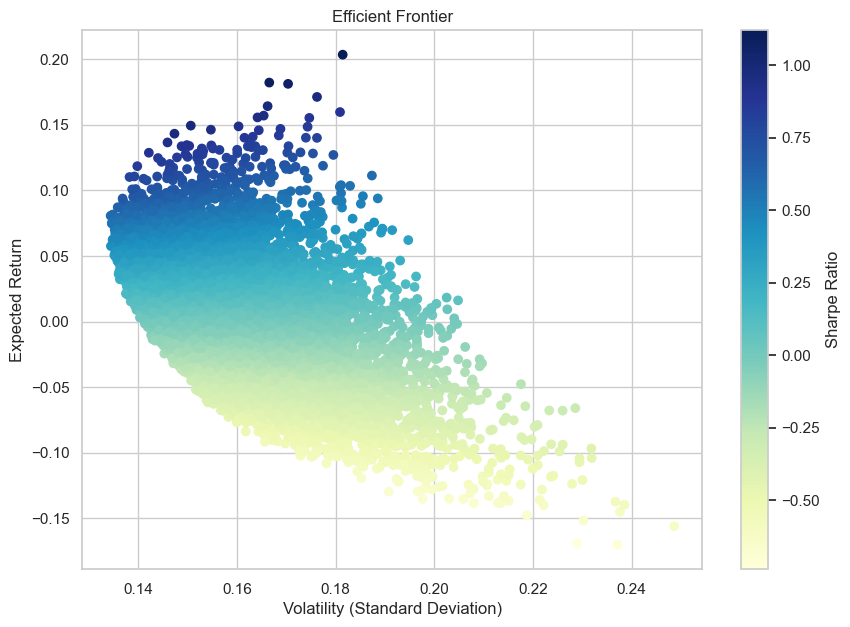

In [30]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

### Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

### Here’s how to identify the portfolio with the maximum Sharpe ratio:

In [32]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.20344379187822725, 0.18143803364132197, 1.121285255330796)

### The portfolio with the maximum Sharpe ratio has the following characteristics:
### Expected Return: ~20.34%
### Volatility: ~18.14%
### Sharpe Ratio: ~1.12

### Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [34]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.173505
1,IRCTC.NS,0.175921
2,NESTLEIND.NS,0.231230
3,RELIANCE.NS,0.362124
4,TCS.NS,0.057220


### The output shows a diversified portfolio with the following allocations:
### HDFCBANK (17.35%)
### IRCTC (17.59%)
### NESTLEIND (23.12%)
### RELIANCE (36.21%)
### and TCS (0.57%).

### RELIANCE has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while TCS has the smallest allocation. This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.

# Summary
### So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.